# 1. Introduction

This coursework aims to find the best natural language processing model that could be able to classify the news into some finite categories.  This can help later on the search engines, for example, to classify the corpus to be displayed to the user based on the search keywords that are relevant to the user's input.

### 1.1 Domain-specific area

The journalism Industry has always been a great candidate for NLP challenges. Due to the immense number of articles, it provides a huge corpus to try out NLP algorithms to help and aid news publishers in achieving the fastest time to deliver their articles. The journalism industry had always had a wide array of challenges to which NLP could be a solution. One of the prominent problems is keeping an archive for the news categories. News articles are published since the beginning of the world wide web on the internet. However, news outlets had always faced the problems of going through millions of articles reading them and then classifying them into a news category. With the help of NLP and modern AI techniques, the classification problem is a problem of the past. Gone are the days when news auditors would go through countless words in order to classify them. In this report, we would compare different machine learning techniques and provide some metrics to help choose which algorithm would be suitable for our classification task. Our project could have even future integrations with a computer vision OCR tool which could even classify old articles before even the age of the internet. With it, the news outlet could have a huge archive which is properly classified. Though a potential project, we would only focus on the NLP task at hand. We hope that by the end of this report, we would have a fully functional model which could classify news articles into different categories. This would save the effort, time, and money which news outlets usually spend on classifying articles.
Another application to our model is integrating it with news feeder apps. As there are millions of articles on the internet with categories. Our model could help these news readers categorize the articles and organize them for the reader to enjoy and start even to recommend articles based on their categorisation.


### 1.2 Objectives
The objective of our project is to find a suitable classification algorithm which would provide news outlets with predicting the news articles' category from its headline and abstract with a click of a button. The objectives of the report could be summarised as follows: 


1. Finding a dataset from real life which would provide the basis for training our model.
2. Exploring key features for the dataset using EDA techniques.
3. Provide a way to numerically analyze the content of the articles for easy classification as the model would not understand pieces of strings alone.
4. Comparing TF-IDF vs. Count Vectorization in converting strings to numerical values.
4. Comparing different machine learning classification models against a simple baseline model.
5. Providing different metrics for classification tasks. (TF-IDF vs. Count Vectorization) and (Naive Bayes vs. Random Forest vs. Logistic Regression).

It is important to go through multiple models as there is no silver bullet model for NLP problems. Thus as data scientists, it is our task to search our modelling toolbox and find an optimum and efficient way to classify articles into their corresponding categories. Thus we would try different combinations of algorithms and numerical representations of text to find the optimum combo.

Even if the classification model does not provide the necessary accuracy. It still has the potential to be used as a recommendation system which would still help news outlets into classifying the articles into the correct category. The results of the model would contribute as a step into automating the lives of many news outlets which would still save time, effort, and cost.






### 1.3 Dataset 

In this coursework, we will be using the "News Category Dataset" which provides us with a huge amount of data that consists of 209527k news headlines. The dataset is provided by Rishabh Misra and uploaded on Kaggle. This dataset was gathered from 2012 to 2022 and obtained from the HuffPost website. The dataset can be used to perform a wide variety of computational linguistic tasks due to its immense corpus which is categorized by article. Each row in this dataset consists of 6 features:

*link* (String): the URL of the news article.

*headline* (String): the title of the news article.

*category* (String): the category that the news article belongs to and this would be used as our target label.

*short_description* (String): the abstract of the news article.

*authors* (String): the author(s) who published the news article.

*date* (Date): the date of the news article that was published. The date follows the format (YYYY/MM/DD).

Our target is to classify the given news article into its corresponding category using mainly the short_description and the headline features, we have 207996 unique headlines and 187022 unique short descriptions.
We have 42 unique news categories, each category contains at least 1014 news articles. The top 10 ones with the corresponding number of news articles they include, in descending order, are:

* *POLITICS*: 35602
* *WELLNESS*: 17945
* *ENTERTAINMENT*: 17362
* *TRAVEL*: 9900
* *STYLE & BEAUTY*: 9814
* *PARENTING*: 8791
* *HEALTHY LIVING*: 6694
* *QUEER VOICES*: 6347
* *FOOD & DRINK*: 6340
* *BUSINESS*: 5992

As seen above, our dataset needs to be balanced. An imbalanced dataset means unequal distribution of the observations for each class label, therefore we should pay attention while evaluating our NLP models and not depend only on the accuracy metric as it wouldn't be accurate enough due to the imbalance in our dataset.

There are 194118k news articles gathered between January 2012 and May 2018 and from May 2018 to September 2022 15422k news articles are gathered. The top date that the data was collected was 2014-03-25. However, the HuffPost website does not maintain anymore this immense number of news articles.

Our dataset contains 471 duplicate rows in the short_description, headline, and category columns. Duplicates will be dropped in our data preprocessing phase as they are at the end of the same article.

### 1.4 Evaluation methodology

  As our dataset contains imbalances in the target variable (Categories). We would not mainly look at accuracy as it would not give a clear picture of how our model is performing, as accuracy is just a percentage of how well we predict vs. the number of predictions. If we are unlucky and all our major class labels are predicted correctly then we would have very high accuracy. However, this model may fail in a real-case scenario where all categories are of unequal distribution. We would however look at a confusion matrix consisting of different metrics such as precision, recall and the F1-Score.

  We can define precision as the ratio between the True Positives, or the actual class label or category, vs. what the model has predicted as the class label which is the number of true positives and false positives. The formula is given as follows 
  $\text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$
The recall is also a metric which would be beneficial when we have imbalances in the class labels. The recall is mainly a ratio between the True positive class and the Total actual number of positive labels. The formula is given as    Lastly, the F1- Score is a metric which is a mix between recall and precision. The formula is given by  $\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$ Lastly, the F1- Score is a metric which is a mix between recall and precision. The formula is given by $\text{F1-Score} = 2* \frac{\text{Precision}* \text{Recall}}{\text{Precision} + \text{Recall}}$ .

We will use the F-1 Score thorough out our analysis as it would be appropriate to capture the imbalances in the dataset, unlike the accuracy metric.



## 2. Implementation

Now we will focus on the technical coding part we will first, import our python libraries and download any necessary corpus which would help us with removing stop words and the application of stemming and lemmatization. Also, we import the libraries for data visualization such as seaborn and matplotlib.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import re
import string
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import linear_model, naive_bayes, metrics, preprocessing
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


[nltk_data] Downloading package omw-1.4 to /Users/osx/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/osx/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osx/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/osx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2.1 EDA

In this subsection, we focus on exploring our dataset visually by plotting the strings and visualizing their distribution. We also take a look at the categories we have and each of their counts.


At first, we read our dataset which we downloaded from Kaggle. The file format follows the JSON format. A JSON file is formatted as a {key: object,key: object, etc.}. For example, a single row is given by the following format: {"link": "https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9", "headline": "Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters", "category": "U.S. NEWS", "short_description": "Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.", "authors": "Carla K. Johnson, AP", "date": "2022-09-23"}

In [ ]:
dataframe_news_category=pd.read_json('./News_Category_Dataset_v3.json',lines=True) ## Reads Dataset from path as json lines = True reads the file as a json object per line.


display(dataframe_news_category.tail())
dataframe_news_category.info()

,link,headline,category,short_description,authors,date
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28
209526,https://www.huffingtonpost.com/entry/dwight-ho...,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...,,2012-01-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


There are 209527 rows in our dataset with 6 columns. All are strings except the date on which the article is released which has a datetime64 format.

At first, we replace any empty string with a Null value in order to replace it. However, as we found that there were no empty headlines which we could use to categorize our dataset without the short_description we leave them as it is.
We then search for Null values which are a problem for almost all machine learning models. We luckily find no Null values, except in short_description, which will ease our task. However, if we had found ones we would have dropped them from our dataset. We also replace any empty string

In [ ]:
# Check for null/missing values 
# Replace all empty strings with Nulls to count them in the isnull.sum() function
dataframe_news_category['category'].replace('', np.nan, inplace=True)
dataframe_news_category['short_description'].replace('', np.nan, inplace=True)
dataframe_news_category.isnull().sum()

link                     0
headline                 0
category                 0
short_description    19712
authors                  0
date                     0
dtype: int64

In [ ]:
# Subset Data To get the counts of articles between 2012 to 2018 and from 2018 to 2022.

from_2012_to_2018_headlines = dataframe_news_category[dataframe_news_category["date"].isin(pd.date_range(dataframe_news_category['date'].dt.date.min(), "2018-1-28"))].value_counts() #194118
print(len(from_2012_to_2018_headlines))
from_2018_to_2022_headlines = dataframe_news_category[dataframe_news_category["date"].isin(pd.date_range("2018-1-28", dataframe_news_category['date'].dt.date.max()))].value_counts() #15422
print(len(from_2018_to_2022_headlines))

174406
15422


We have 42 unique categories, we show the counts for each category as seen the categories are imbalanced with 'Politics' being the majority class and 'Education' the least.


In [ ]:
print(dataframe_news_category['category'].value_counts())

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

We now drop articles that are duplicated. We consider an article duplicated if our 3 main columns of concern (short_description, headline, category) are a duplicate as this would be considered as a duplication which is unnecessary for our modelling. We find 471 rows of such instances.

In [ ]:
# Check if there is a article that is duplicated with a short_description','category','headline
duplicateRows = dataframe_news_category[dataframe_news_category[['short_description','category','headline']].duplicated()]
print(len(duplicateRows))

#Drop Duplicated with keeping the first duplicate as the value kept
dataframe_news_category.drop_duplicates(keep = 'first', inplace = True,subset=['short_description','category','headline'])

471


We drop (link, date, authors) columns. The link column is considered an identifier, each article has its unique link. The author could write in multiple categories for example an author can write in comedy, tech, sports, etc. So the authors columns won't determine the category. Lastly, the published date won't affect the category as well.

In [ ]:
#Drop unused columns which are link ,date, author
dataframe_news_category = dataframe_news_category.drop(columns=['link','date','authors'])
dataframe_news_category.tail()

,headline,category,short_description
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr..."
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...
209526,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...


Now we plot the categories as a bar chart to see their distribution visually.

<AxesSubplot:>

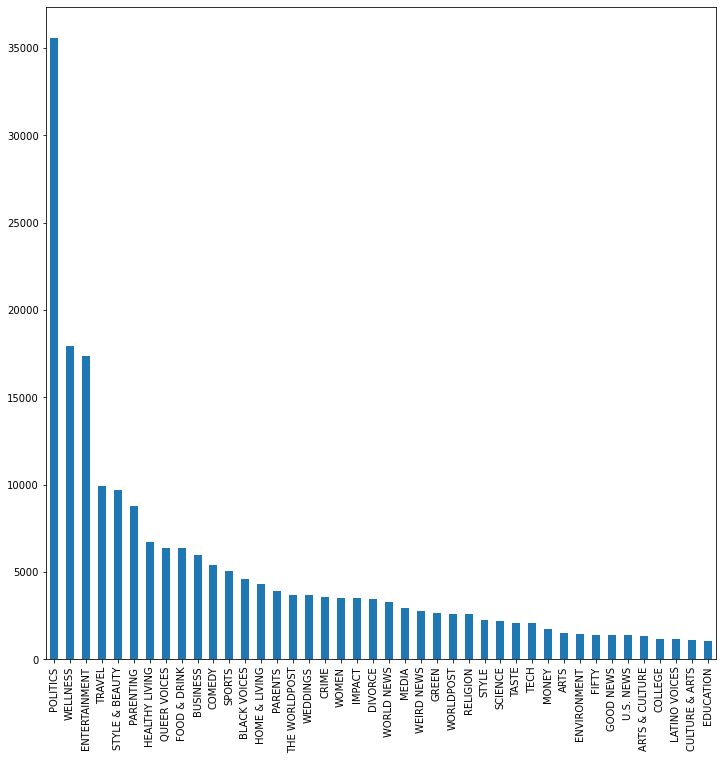

In [ ]:
# let's discover the top categories
# Plotting the total number of news by category for better visualization as a bar plot using matplotlib
plt.figure(figsize=(12, 12))
dataframe_news_category['category'].value_counts().plot(kind='bar')

We now start visualizing the top words used in each category by displaying a word cloud per category. The word cloud is very useful when presenting the classification algorithm to a layman person as they will get a colourful presentation on how the algorithm works by looking at word similarities and frequencies which helps bridge the connection between the technical side and the client side. For example, the words 'Travel', 'Hotel', 'Photo', and 'World' are frequent words in articles in the category of Travel. As the word size increases the frequency increases also.

We also remove stop words during our process. In order to remove redundant stop words such as articles and conjugations. 

We also concatenate the 'headline' column with the 'short_description' column to generate one column which will be the string on which we would do our classification.

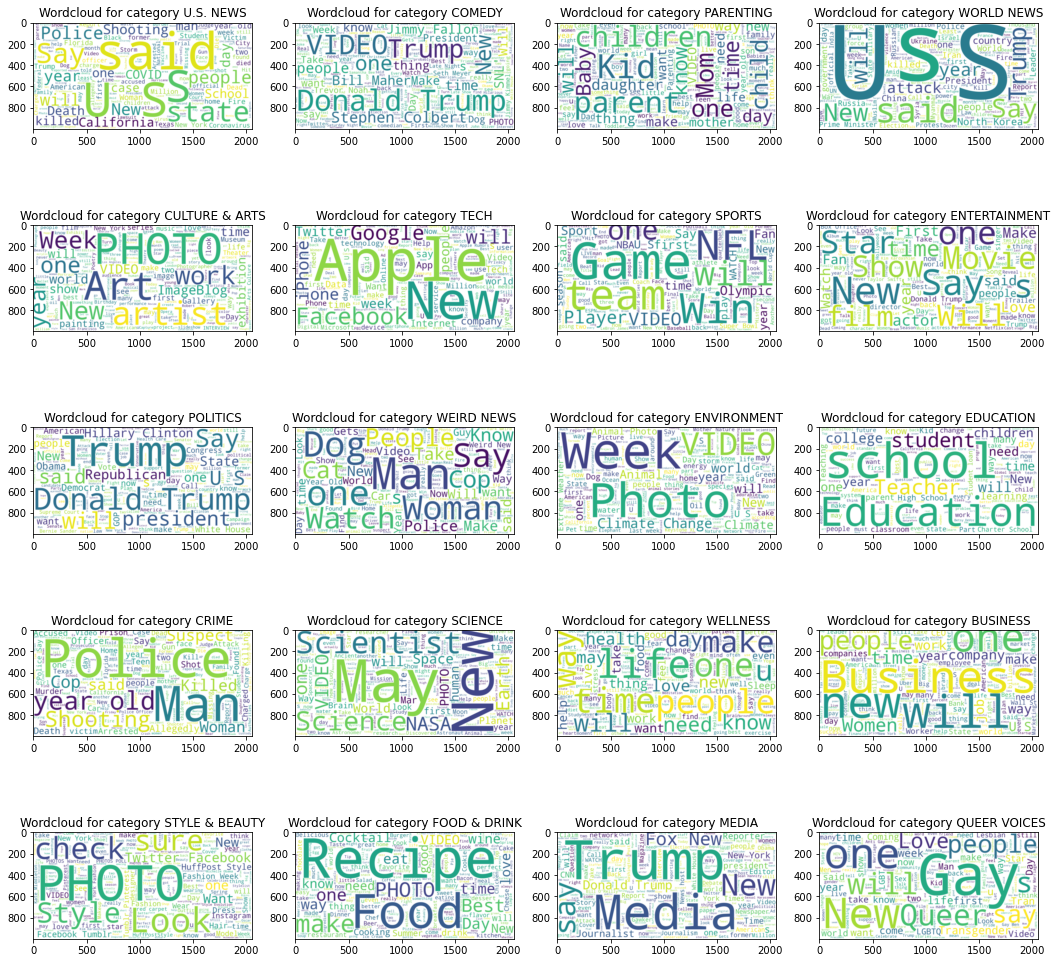

In [ ]:
# let's make wordcloud for the first 20 categories to see the top words per category
# Set the nan values to null to avoid crashes in the word cloud algorithm
dataframe_news_category['short_description'].replace(np.nan, '', inplace=True)

#get the categories values as a numpy array 
categories=pd.unique(dataframe_news_category['category'])
## concat the headline with short description in order to manipulate one column which contains all the texts
dataframe_news_category['headline_shortDescription']=dataframe_news_category['headline']+' '+dataframe_news_category['short_description']
textNews_per_category = []

## For each category get the headline_shortDescription column and contcat them into a large string to start building the word cloud
for i in categories:
    category = dataframe_news_category[dataframe_news_category['category'] == i]
    text = category['headline_shortDescription'].values  # array of news textNews text in each category
    textNews_per_category.append(text)
# Creating word cloud with a max of 500 words to display. Also removinf the stop words in order to remove redundant words such as articles and conjugations
wc_per_category = WordCloud(max_words=500, min_font_size=20, height=1000, width=2050, background_color='white', stopwords=STOPWORDS)
plt.figure(figsize=(18,18))
## Plotting the first 20 word clouds only to grasp an idea on how they work.
for index, cat in enumerate(categories[:20]):
    plt.subplot(5,4,index+1)
    wordCloud = wc_per_category.generate(' '.join(textNews_per_category[index]))
    plt.imshow(wordCloud, interpolation= "bilinear")
    plt.title(f"Wordcloud for category {cat}")
    # plt.axis('off')

### 2.2 Text Preprocessing

Now we shift our focus onto discussing the text preprocessing section. At first, we sanitize the data using the most popular methods used in the NLP literature. We first concatenate our 2 main columns which are "short_description" and "headline". We then apply to the newly generated column "headline_shortDescription" a function which simply makes all words into lowercase. Afterwards, we remove stop words from the new column by going through each piece of text and comparing it with the STOPWORDS list which is imported from the wordcloud library.  It is important to understand that stop words could hinder our algorithm as most English sentences contain stop words such as conjugations, and articles which would not be helpful in our classification task. Furthermore, we lemmatize the strings using the WordNetLemmatizer. We lemmatize as we would like all words to return their original meaning, for example, the word caring and cared would be lemmatized into care. We avoided using stemming as stemming just deletes the extra letters without taking into consideration the context and meaning of the word. For instance, caring would be converted to car which is a totally different word. Lastly, we remove all punctuations for completeness. We store our clean headline_shortDescription into a new column called clean_text.

In [ ]:
## Function to lowercase text
def text_cleaning(text):
  text=text.lower()
  text=re.sub(r"[\W\d\s]"," ",text)
  return text.strip()

## Function to remove stopwords using the STOPWORDS list in the word cloud library
def remove_stopwords(text):
  text=text.split()
  text_array = [t for t in text if t not in list(STOPWORDS)]
  return " ".join(text_array)

## Function to remove punctuation in text
def remove_punctuations(text):
  text = "".join([t for t in text if t not in string.punctuation and not t.isdigit()])
  return text

## Function to lemmatize nouns and verbs based by using the word tokenize function
def lemmatisation(text):
  lemmatizer=WordNetLemmatizer()
  text=" ".join([lemmatizer.lemmatize(str(i),str(j[0].lower())) if str(j[0]).lower() in ['n','v'] else lemmatizer.lemmatize(str(i)) for i,j in pos_tag(nltk.word_tokenize(text))])
  return text



In [ ]:
## Applying the cleaning functions to the headline_shortDescription

print('Example Sentence before cleaning: ',dataframe_news_category['headline_shortDescription'][5])
dataframe_news_category['clean_text']=dataframe_news_category['headline_shortDescription'].apply(text_cleaning)
dataframe_news_category['clean_text']=dataframe_news_category['clean_text'].apply(remove_stopwords)
dataframe_news_category['clean_text']=dataframe_news_category['clean_text'].apply(lemmatisation)
dataframe_news_category['clean_text']=dataframe_news_category['clean_text'].apply(remove_punctuations)

print("**********")
print('Example Sentence after cleaning: ',dataframe_news_category['clean_text'][5])

Example Sentance before cleaning:  Cleaner Was Dead In Belk Bathroom For 4 Days Before Body Found: Police The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.
**********
Example Sentance after cleaning:  cleaner dead belk bathroom day body find police year old woman see work south carolina store thursday find dead monday family report miss authority say


Lastly, we convert our target variables which is the category into a numerical represeantation with each category getting assigned an arbitrary number. For example, The category 'Arts' gets the arbitrary number 40. We save a dictionary category_to_id to hold the one to one mapping between the integers and categories in an easy access way which we will need to use later.

In [ ]:
#Converting the categorize into numerical values
dataframe_news_category['category_id'] = dataframe_news_category['category'].factorize()[0]
#Creating a dictionary with each category value and ID which would be used in the future
category_to_id = dict(dataframe_news_category[['category', 'category_id']].drop_duplicates().sort_values('category_id').values)
dataframe_news_category.tail()


,headline,category,short_description,headline_shortDescription,clean_text,category_id
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,rim ceo thorsten heins significant plan blackb...,5
209523,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",Maria Sharapova Stunned By Victoria Azarenka I...,maria sharapova stun victoria azarenka austral...,6
209524,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...","Giants Over Patriots, Jets Over Colts Among M...",giant patriot jet colts among improbable super...,6
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,Aldon Smith Arrested: 49ers Linebacker Busted ...,aldon smith arrest er linebacker bust duo corr...,6
209526,Dwight Howard Rips Teammates After Magic Loss ...,SPORTS,The five-time all-star center tore into his te...,Dwight Howard Rips Teammates After Magic Loss ...,dwight howard rip teammate magic loss hornet f...,6


### 2.3 Text representation & Feature Engineering

As computers are not generally good at handling pieces of strings. We would have to convert them into a representable type that the classification algorithms would easily understand. Computers are good with numbers, so we convert each word into a column and we put the count of the word in the sentence under the corresponding column. This procedure is done for each row or in our data set for each article and specifically for each entry in the clean_text after it is cleaned. We use the max_features parameter to store only the most frequent 5000 words in our dataset. This procedure is called Count Vectorization and is one of the most famous feature engineering techniques in NLP. Count Vectorization is a procedure where we convert simple text to a sparse matrix with each word being a column each row an entry in our dataset and the count of each word in this sentence is the entry in our sparse matrix.

In [ ]:
## Applying the count vectorization function with a maximum of 5000 words to the clean text
bow_count_vect= CountVectorizer(max_features= 5000)
bow_transform_count_vect=bow_count_vect.fit_transform(dataframe_news_category['clean_text'])

We print the columns of our sparse matrix below or the most recurrent 5000 words.

In [ ]:
## Printing the top 5000 words found using the word vectorizer
display(bow_count_vect.vocabulary_.keys())
print(len(bow_count_vect.vocabulary_))

dict_keys(['million', 'american', 'roll', 'target', 'covid', 'health', 'expert', 'say', 'early', 'predict', 'whether', 'demand', 'match', 'dose', 'new', 'order', 'fall', 'airline', 'charge', 'ban', 'life', 'punch', 'flight', 'attendant', 'video', 'passenger', 'crew', 'flee', 'back', 'accord', 'attorney', 'office', 'los', 'angeles', 'funniest', 'tweet', 'cat', 'dog', 'week', 'sept', 'don', 'understand', 'parent', 'accidentally', 'put', 'grown', 'toddler', 'scream', 'clean', 'teeth', 'carolina', 'dip', 'sauce', 'woman', 'call', 'cop', 'black', 'bird', 'lose', 'lawsuit', 'ex', 'employer', 'amy', 'cooper', 'accuse', 'investment', 'firm', 'franklin', 'fire', 'brand', 'racist', 'central', 'park', 'encounter', 'go', 'viral', 'dead', 'bathroom', 'day', 'body', 'find', 'police', 'year', 'old', 'see', 'work', 'south', 'store', 'thursday', 'monday', 'family', 'report', 'miss', 'authority', 'reporter', 'get', 'adorable', 'surprise', 'boyfriend', 'live', 'tv', 'behind', 'anchor', 'york', 'ask', 'jo

5000


We now explore another method to convert our strings into numerical quantities which could be fed into our classification algorithms. The method which differs from count vectorizor is the Term Frequency Inverse Document Frequency of TF-IDF shortly. TF-IDF differes in the important aspect on how we quantify our strings. Unlike Count vectorizers which gives the words' counts in this particular sentence, TF-IDF focuses more on the weight of words. This is important as TF-IDF measures how important a word is in the corpus. The higher the IF-IDF the more relevant the word is. On the other hand, a score approaching 0 TF-IDF scores a word by using the following simple formulas 

$TF =  \frac{\text{number of times the word appears in a row}}{\text{total number of words in a row}}$

$IDF= \log({\frac{\text{number of rows in the corpus}}{\text{number of rows in the corpus that contain the row}}})$

$TFIDF = TF*IDF$

There are some parameters we could adjust such as the max number of features we have which is the maximum number of words we would consider, sublinear_tf which when equals True looks on a different form of a TF-DF which gives a different formula for calculating the TF part of our formula. which is given by:

$ 
WF =   \left\{
\begin{array}{ll}
      1 + \log{(TF)} & TF>0 \\
      0 & otherwise \\
\end{array} 
\right.  $

We then multiply  $WFIDF = WF * IDF$.

Moreover, min_df is used to remove extremly rare words that appear in our corpus. We use min_df = 3 to set that we should ignore words that appear less than 3 times. We also use the L2 Norm to nomralize our TF-IDF. The L2 norm uses the eucladian distance to scale the values such that if we square and add them up the value would be 1. We set our TF-IDF to include N-grams which are 1 to 2 words long in order to get more context out of our model.

In [ ]:
## Applying the tfidf function with a maximum of 5000 words to the clean text

bow_tfidf_vect = TfidfVectorizer(max_features= 5000,sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2))
bow_transform_tfidf = bow_tfidf_vect.fit_transform(dataframe_news_category['clean_text']).toarray()
labels = dataframe_news_category.category_id

In order to visualize what types of unigrams and bigrams are most frequent in the whole dataset we visualized them into a frequency distribution below. We visualize the top 50 N-Grams in the whole dataset regardless of their categorisation as below.

<Figure size 1440x1440 with 0 Axes>

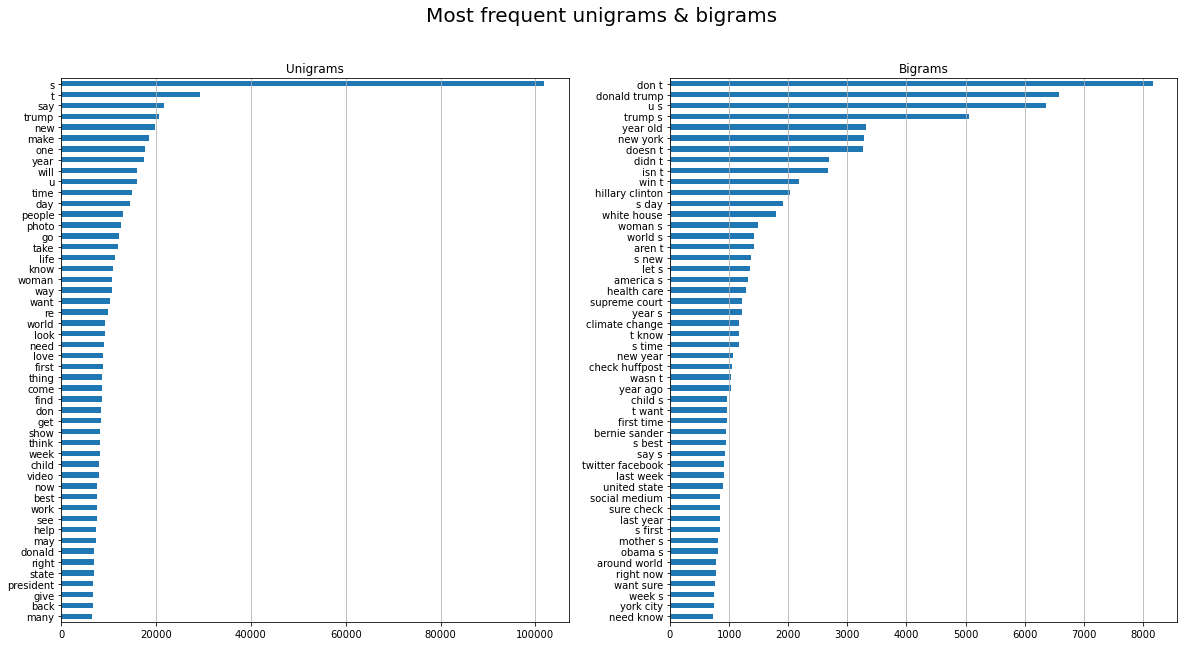

In [ ]:


## Plotting the most frequent 50 unigrams and bigrams for the whole corpus as a horizontal bar chart

plt.figure(figsize=(20,20))
lst_tokens = nltk.tokenize.word_tokenize(dataframe_news_category['clean_text'].str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent unigrams & bigrams", fontsize=20)
fig.set_figwidth(20)
fig.set_figheight(10)

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[0:50,0:50].sort_values(by="Freq").plot( kind="barh", title="Unigrams", ax=ax[0],
                                                                      legend=False).grid(axis='x')
ax[0].set(ylabel=None)
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join( string for string in x) )
dtf_bi.set_index("Word").iloc[0:50,0:50].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

We plot the most common unigrams and bigrams for five arbitrary categories. For example, the category 'Arts' has the most correlated unigrams of artist and art. Moreover, it has the most correlated bigrams 'will make' and 'san francisco'. We use a Chi2 test to test our correlation between the N-grams and the categories.

In [ ]:
## Using the Chi2 test to test and provide the most correlated words with each category. We limit it to only 5 categorize due to computational resources.

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for category, category_id in sorted(category_to_id.items())[:5]:
  features_chi2 = chi2(bow_transform_tfidf, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(bow_tfidf_vect.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'ARTS':
  . Most correlated unigrams:
. artist
. art
  . Most correlated bigrams:
. will make
. san francisco
# 'ARTS & CULTURE':
  . Most correlated unigrams:
. art
. artist
  . Most correlated bigrams:
. new book
. harry potter
# 'BLACK VOICES':
  . Most correlated unigrams:
. racial
. black
  . Most correlated bigrams:
. african american
. black woman
# 'BUSINESS':
  . Most correlated unigrams:
. company
. business
  . Most correlated bigrams:
. wall st
. woman business
# 'COLLEGE':
  . Most correlated unigrams:
. campus
. college
  . Most correlated bigrams:
. sexual assault
. college student


Now we start splitting our data into a train and test dataset. The training dataset contains 80% of the data and the test dataset contains the rest which is 20%. We do such for the Count Vectorized data set and the TF-IDF data set which would be fed into the model to compare the results of whether using TF-IDF or Count Vectorizer is better per classification model. We also obtain our y-train and y-test datasets which be useful when trying to quantify our model performance.

In [ ]:
# Shuffling the dataframe randomly
dataframe_news_category = dataframe_news_category.sample(frac=1).reset_index(drop=True)


## Splitting the data to get the y-train and y-test
_, _, y_train, y_test = train_test_split( dataframe_news_category['clean_text'], dataframe_news_category['category'], test_size=0.20,
                                                    random_state = np.random.seed(12345), shuffle= False)

## Splitting the data to get the x-train and x-test from the count vectorized dataset

X_train_count_vect, X_test_count_vect, _, _ = train_test_split( 
bow_count_vect.fit_transform(dataframe_news_category['clean_text']), dataframe_news_category['category'], test_size=0.20, 
                                                    random_state = np.random.seed(12345), shuffle= False)

## Splitting the data to get the x-train and x-test from the tf-idf dataset

X_train_tfidf_vect, X_test_tfidf_vect, _, _ = train_test_split( 
bow_tfidf_vect.fit_transform(dataframe_news_category['clean_text']), dataframe_news_category['category'], test_size=0.20, 
                                                    random_state = np.random.seed(12345), shuffle= False)

### 2.4 Baseline Model Performance
Our baseline model is created with a simple format. It always predicts the majority class. We used this baseline model as it prevelant in the literature for classification tasks. Our majority class is Politics thus it would be predicted always. We simulate such model by creating a predictions dataframe which consitutes of the class label politics only. We then compute the accuracy against using the y-test which would be used in further models. We get a result of 28.97% which is of course very low. Hopefully, our new models would outpreform such naive and basic model.

In [ ]:
## Creating a majorit class model which is simply a dataframe with the class label politics only. We evaluate its preformance using the F1- Score
df_politics = pd.DataFrame({"Majority_Class_Model":["POLITICS"]*len(y_test)})
print('The Majority Class Dummy Model F1- Score is in %:',metrics.f1_score(df_politics['Majority_Class_Model'], y_test,average='weighted')*100)


The Majority Class Dummy Model F1- Score is in %: 28.898800998485903


Our baseline model is created with a simple format. It always predicts the majority class. We used this baseline model as it is prevalent in the literature for classification tasks. Our majority class is Politics thus it would be predicted always. We simulate such a model by creating a prediction data frame which consists of the class label politics only. We then compute the accuracy using the y-test which would be used in further models. We get a result of 28.97% which is of course very low. Hopefully, our new models would outperform such naive and basic models.

In [ ]:
# Creating a function to create a model , fit it , test it and return the F1- Score. This helps us modularize our code better.
def build_model(clf, vector_train, y_train, vector_test):
  clf.fit(vector_train, y_train)
  predictions=clf.predict(vector_test)
  return metrics.f1_score(y_test, predictions, average='weighted')

### 2.5 Classification approach
We now consider trying 3 different classification algorithms which are the Naive Bayes algorithm, multinomial logistic regression, and lastly the random forest algorithm. We will consider our features to be the sparse matrices which are an output for either teh Count Vectorization procedure of the TF-IDF procedure. We will train all models on the corresponding training dataset whether the TF-IDF or the Conut Vectorized one and then evaluate the results according to the evalutaion methods discussed before.

Firstly we introduce the naive bayes algorithm, the Naïve Bayes classifier is a conditional probabilistic classifier that assumes that all the our dataset features are independent of each other and it's called *naïve* because this is a naïve assumption and not applied on the real life scenarios, nevertheless surprisingly it performs well and leads to convincing results. It's a probabilistic classifier because it's based on the bayes theorem that calculates the posterior probability and prior probability while building the frequency and likelihood tables.

In Naïves Bayes algorithm, we compute the frequency and the probability tables for each attribute per class label then substitute these probability values in the Naïve Bayesian equation to calculate the posterior probability per class label ( **P(y|X)** ) and the class label with the highest posterior value is considered as the predicted value.

If the combination of a class label and a certain attribute value together is missing or didn't occur in our training dataset therefore we will get a zero when all these probability values are multiplied thus the frequency-based probability estimate will always be zero and our model will be biased to a certain class label while predicting the values from our test dataset. This problem is known as the *Zero Probabilities* or *Zero Frequency*.

In [ ]:
# Naive Bayes 

# Naive Bayes on Count Vectors
f1_score = build_model(naive_bayes.MultinomialNB(), X_train_count_vect, y_train, X_test_count_vect)
print("NB, WordLevel Count Vectors: %.3f " % round(f1_score,2))

# Naive Bayes on Word Level TF IDF Vectors
f1_score = build_model(naive_bayes.MultinomialNB(), X_train_tfidf_vect, y_train, X_test_tfidf_vect)
print("NB, WordLevel TF-IDF: %.3f " % round(f1_score,2))

NB, WordLevel Count Vectors: 0.540 
NB, WordLevel TF-IDF: 0.460 


We consider our second algorithm which is the Multinomial logistic regression. An extension to the famous binary classification algorithm the logisitc regression. The multinomial logisitc regression solves classification problems which the outcome may have multiple classes instead of just two.

With two or more alternative outcome classes, this model is used to forecast the probabilities of categorically dependent variables by utilizing the joint probability function to predict each probability for each class.

In [ ]:
# Linear Classifier on Count Vectors
# We set max_iterations for the solver to converge to a value and we use the Limited-memory BFGS  due to our small computational power
f1_score = build_model(linear_model.LogisticRegression(solver="lbfgs",multi_class="multinomial",max_iter=4000), X_train_count_vect, y_train, 
                       X_test_count_vect)
print("LR, Count Vectors:  %.3f " % round(f1_score,2))

# Linear Classifier on Word Level TF IDF Vectors
f1_score = build_model(linear_model.LogisticRegression(solver="lbfgs",multi_class="multinomial",max_iter=4000), X_train_tfidf_vect, y_train,
                       X_test_tfidf_vect)
print("LR, WordLevel TF-IDF:  %.3f " % round(f1_score,2))

LR, Count Vectors:  0.560 
LR, WordLevel TF-IDF:  0.560 


Lastly, we introduce the Random Forest algorithm. The Random Forest classifier is an ensemble of decision trees, each decision tree consists of a number of features and observations randomly selected and all these decision trees are trained in parallel. The results of all these decision trees are combined to produce the final output of the forest based on the most dominant class label. We can say that random forest is based on one of the ensemble methods called *bagging* method. Bagging method is divided into two phases, the first phase is bootstrapping which means sampling with replacement and each decision tree is trained independently. The second phase is aggregation which means the results of all these decision trees are aggregated to produce the final class label.

In [ ]:
# RF
# We use an ensemble of 80 decision trees which have a maximum depth of 20.

# RF on Count Vectors
f1_score = build_model(RandomForestClassifier(n_estimators=80, max_depth=20, random_state = np.random.seed(1234)), X_train_count_vect, y_train,
                       X_test_count_vect)
print("RF, Count Vectors: %.3f " % round(f1_score,2))

# RF on Word Level TF IDF Vectors
f1_score = build_model(RandomForestClassifier(n_estimators=80, max_depth=20, random_state = np.random.seed(1234)), X_train_tfidf_vect, y_train,
                       X_test_tfidf_vect)
print("RF, WordLevel TF-IDF: %.3f " % round(f1_score,2))

RF, Count Vectors: 0.240 
RF, WordLevel TF-IDF: 0.240 


## 3 Conclusions
### 3.1 Evalutaion

We can see that when using the F1 - Score metric on the Naive Bayes algorithm with the count vectorized dataset yields a result of 54% while using the TF-IDF dataset it yielded 46%. This difference of 8% is due to maybe the naive Bayes being a naive algorithm would prefer just a frequency instead of a weighted scale that is correlated to the word frequency across all rows. Thus I believe that it is more appropriate using the Count Vectorized dataset instead of the TF-IDF one when using the Naive Bayes algorithm due to its assumptions. Still, our model performed better than our baseline model which is a promising fact given the NLP task at hand.

We also see that the Logistic Regression yielded the highest F1 - Score with a result of 56% for both the TF-IDF and Word Vectorized datasets. Interestingly, both datasets performed equally the same with the multinomial logistic regression. This means that the algorithm was able to classify regardless of how the dataset was presented in any format. This makes it the best candidate to use for the problem at hand due to many aspects which are: It yielded the highest F1 - Score, it can generalize on both datasets, and the interpretability of the algorithm as it is not considered a black box algorithm.

It's also surprising that the Random Forest w yielded the least F1- Score. This is probably because we have a highly unbalanced dataset that it may be able not to capture. The F1 - Score was the least with a value of 37 % for the count vectorized dataset and 36% for the TF - IDF.




### 3.2 Summary and conclusions

To summarize, our model has performed on average relative to other projects conducted using the same dataset. Our model however was able to compare the results between two different approaches to convert our text representation into numerical ones. We have also compared three different modelling techniques to find the optimum results for the journalists. Moreover, most works on our dataset were confined to using accuracy as a metric to evaluate performance. However, we believe that the F1 - Score is a better metric due to the high imbalances in our class labels. We also provided an elaborate visualization which may help bridge the gap between data scientists and laymen as it's always a problem of explaining how the model works abstractly to business people. Our project is transferable to different domain-specific areas other than just merely classifying news articles as it could be utilized in a wide array of different aspects of text classification. The model could be transferable to aspects such as different news outlets. As we have made a categorization on abstract categories that are abundant in most news outlets and journals. Our model could be replicated using different programming languages such as R and Julia as they share the same logic which could be a task for the future. Also, more complex algorithms such as deep learning techniques could capture the high dimensionality of the data and provide better metrics. The downside of these algorithms is their black box techniques which could be difficult to grasp and explain to the business side. Also, deep learning techniques require high computational power which may not be available at most news outlets. All in all, we have provided a thorough comparison between different techniques that could be expanded into the future. The introduction of AI and NLP would be fruitful for news outlets.


## References

1. Sen, A. (2020, December). Text Classification — From Bag-of-Words to BERT — Part 1 (BagOfWords) | by anirban sen | Analytics Vidhya | Medium. https://medium.com/analytics-vidhya/text-classification-from-bag-of-words-to-bert-1e628a2dd4c9
2. Reyes, S. (2019). Multi-class text classification (TFIDF) | Kaggle. https://www.kaggle.com/code/selener/multi-class-text-classification-tfidf#Text-classification-(multiclass)
3. Patel, M. (2022, October). Naive Bayes Classifier from Scratch | Kaggle. https://www.kaggle.com/code/maharshpatel/naive-bayes-classifier-from-scratch/notebook
4. Ma, E. (2018). 3 basic approaches in Bag of Words which are better than Word Embeddings | by Edward Ma | Towards Data Science. 07. https://towardsdatascience.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016
5. Barua, J. (2020, August). Word Embeddings Versus Bag-of-Words: The Curious Case of Recommender Systems | by Josh Barua | The Startup | Medium. https://medium.com/swlh/word-embeddings-versus-bag-of-words-the-curious-case-of-recommender-systems-6ac1604d4424
6. Uzila, A. (2022, August). All You Need to Know About Bag of Words and Word2Vec — Text Feature Extraction | by Albers Uzila | Towards Data Science. https://towardsdatascience.com/all-you-need-to-know-about-bag-of-words-and-word2vec-text-feature-extraction-e386d9ed84aa#6400
7. Amin, H. (2020, January). Sentiment Analysis Using Classification Approach | Kaggle. https://www.kaggle.com/code/hassanamin/sentiment-analysis-using-classification-approach/notebook#Stopwords
8. Dedhia, H. (2021). Text Classification (NLP) | Kaggle. https://www.kaggle.com/code/heeraldedhia/text-classification-nlp/notebook#Text-Pre-processing
9. Brownlee, J. (2017). What Are Word Embeddings for Text? - MachineLearningMastery.com. https://machinelearningmastery.com/what-are-word-embeddings/
10. Chakravarthy, S. (2020). Preprocessing for Natural Language Processing | by Srinivas Chakravarthy | Medium. https://srinivas-yeeda.medium.com/preprocessing-for-natural-language-processing-498df071ab6e
11. Yava, S. (2019, January). BBC Text MultiClass Classification | Kaggle. https://www.kaggle.com/code/saikumar587/bbc-text-multiclass-classification
12. Li, S. (2018). Multi-Class Text Classification with Scikit-Learn | by Susan Li | Towards Data Science. https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f
13. Neupane, P. (2020, December). Text Classification in Natural Language Processing. https://www.analyticsvidhya.com/blog/2020/12/understanding-text-classification-in-nlp-with-movie-review-example-example/
14. Patel, M. (2022, April). Naive Bayes Classifier from Scratch | Kaggle. https://www.kaggle.com/code/maharshpatel/naive-bayes-classifier-from-scratch/notebook
15. Akdogan, A. (2022). Word Embedding Techniques: Word2Vec and TF-IDF Explained | by Adem Akdogan | Towards Data Science. https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08
16. Misra, R. (2022). News Category Dataset. http://arxiv.org/abs/2209.11429
17. Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science &amp; Engineering, 9(3), 90–95.
18. Pedregosa, F., Varoquaux, Ga"el, Gramfort, A., Michel, V., Thirion, B., Grisel, O., … others. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12(Oct), 2825–2830.
19. Oesper, L., Merico, D., Isserlin, R., & Bader, G. D. (2011). WordCloud: a Cytoscape plugin to create a visual semantic summary of networks. Source Code for Biology and Medicine, 6(1), 7.
20. Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: analyzing text with the natural language toolkit. " O&#x27;Reilly Media, Inc."
21. Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., … Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585, 357–362. https://doi.org/10.1038/s41586-020-2649-2
22. McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).